<a href="https://colab.research.google.com/github/lucaszm7/CNC_Aprox_SELAs_Interpol_IntegDiff/blob/main/Lucas_Morais_Relatorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**


In [ ]:
#Bibliotecas Aqui!
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *

### Função auxiliar para o plot das funções

In [ ]:
def plota(inicio, fim, n_ptos, f, color='green',title='Questão XXX', linewidth=1):

  # Retorna 'n_ptos' valores igualmente espaçados entre o 'inicio' e o 'fim'
  # no caso serão os nossos valores de 'x'
  curva = np.linspace(inicio, fim, n_ptos)

  # Com os valores de 'x'(colocados na variavel 'curva') fazemos um for para 
  # passar todos eles na nossa função 'f(x)' e pegar os valores de 'y'(colocados
  # na variavel 'valores')
  valores = [f(x) for x in curva]

  # Mandamos os valores de 'x' e 'y' para plotar no gráfico
  plt.plot(curva, valores, linestyle='-', linewidth=linewidth, color=color, label='F(X)')
  plt.plot([inicio, fim], [0, 0], color='black', linewidth=2)

  # E temos varias customizações que podemos fazer
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(title)
  plt.grid()

  plt.show()

### Funções auxiliares para truncar ou arredondar floats a uma certa precisão

In [ ]:
def truncate(number, decimals):
  factor = int(1 / decimals)
  trunc = math.trunc(number * factor)
  return (trunc / factor)

In [ ]:
def round_epsilon(number, precision):
  n_digits = int(1/precision)
  epsilon = math.log(n_digits, 10)
  return round(number, int(epsilon))

# **Métodos**

## Método da Bisseção

In [ ]:
def bissection(f, a, b, epsilon, iterations, criterio, method_of_precision="truncate"):
  x = (a+b)/2.0
  # Iteraterações para precisão
  i = 0 
  if criterio == "precisao":
    while math.fabs(f(x)) >= epsilon:
      x = (a+b)/2.0
      i+=1
      if f(a)*f(x) < 0.0:
        b = x
      else:
        a = x

      if method_of_precision=="truncate":
        print('For ', i, ' iterations: x = ', truncate(x, epsilon), ' - truncated')
      else: # round
        print('For ', i, ' iterations: x = ', round_epsilon(x, epsilon), ' - rounded')

    if method_of_precision=="truncate":
      return truncate(x, epsilon)
    else: # round
      return round_epsilon(x, epsilon)

  else: # iterations
    # Começa em 0 até 'iterations' incrementando de 1 em 1
    for it in range(0, iterations, 1):
      x = (a+b)/2.0
      if f(a)*f(x) < 0.0:
        b = x
      else:
        a = x
      print('For ', it+1, ' iterations: x = ', x)
    return x

## Método da Falsa Posição

In [ ]:
def false_position(f, a, b, epsilon, iterations, criterio, method_of_precision="truncate"):
  x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
  # Iteraterações para precisão
  i = 0 
  if criterio == "precisao":
    while math.fabs(f(x)) >= epsilon:
      x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
      i+=1
      if np.sign(a) == np.sign(x):
        a = x
      else:
        b = x

      if method_of_precision=="truncate":
        print('For ', i, ' iterations: x = ', truncate(x, epsilon), ' - truncated')
      else: # round
        print('For ', i, ' iterations: x = ', round_epsilon(x, epsilon), ' - rounded')

    if method_of_precision=="truncate":
      return truncate(x, epsilon)
    else: # round
      return round_epsilon(x, epsilon)

  else: # iterations
    # Começa em 0 até 'iterations' incrementando de 1 em 1
    for it in range(0, iterations, 1):
      x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
      if np.sign(a) == np.sign(x):
        a = x
      else:
        b = x
      print('For ', it+1, ' iterations: x = ', x)
    return x

## Método de Newton-Raphson


In [ ]:
def newton_raphson(f, fprime, x, epsilon, iterations, criterio, method_of_precision="truncate"):
  x1 = x - f(x) / fprime(x)
  if criterio == "precisao":
    i = 0
    while math.fabs(f(x1)) >= epsilon:
      i += 1
      x = x1
      x1 = x - f(x) / fprime(x)

      if method_of_precision=="truncate":
        print('For ', i, ' iterations: x = ', truncate(x1, epsilon), ' - truncated')
      else: # round
        print('For ', i, ' iterations: x = ', round_epsilon(x1, epsilon), ' - rounded')

    if method_of_precision=="truncate":
      return truncate(x1, epsilon)
    else: # round
      return round_epsilon(x1, epsilon)

  else: # iterations
    for i in range(0, iterations, 1):
      x = x1
      x1 = x - f(x) / fprime(x)
      print('For ', i+1, ' iterations: x = ', x1)
    return x1

## Método da Secante

In [ ]:
def secant(f, x0, x1, epsilon, iterations, criterio, method_of_precision='truncate'):
  x2 = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
  if criterio == "precisao":
    i = 0
    while math.fabs(f(x2)) >= epsilon and math.fabs(f(x1) - f(x0)) > 1e-12:
      i += 1
      x0 = x1
      x1 = x2
      x2 = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
      if method_of_precision=="truncate":
        print('For ', i, ' iterations: x = ', truncate(x2, epsilon), ' - truncated')
      else: # round
        print('For ', i, ' iterations: x = ', round_epsilon(x2, epsilon), ' - rounded')

    if method_of_precision=="truncate":
      return truncate(x2, epsilon)
    else: # round
      return round_epsilon(x2, epsilon)

  else: # iterations
    for i in range(0, iterations, 1):
      x0 = x1
      x1 = x2
      x2 = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
      print('For ', i+1, ' iterations: x = ', x2)
    return x2

# **Relatório 1**


##Questão 1 – Determine por meio do método da bissecção, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = ***2^x - 2x^2 + 1***

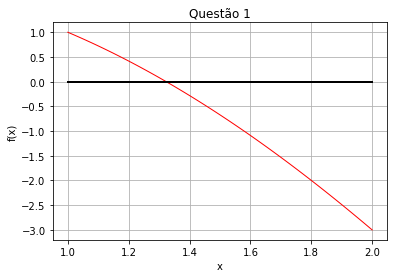

In [ ]:
f1 = lambda x: 2.0**x - 2.0 * x**2.0 + 1.0
plota(1, 2, 100, f1, 'red', 'Questão 1')

In [ ]:
# Por precisão truncado
bissection(f1, 0.0, 2.0, 0.0001, None, 'precisao', 'truncate')

For  1  iterations: x =  1.0  - truncated
For  2  iterations: x =  1.5  - truncated
For  3  iterations: x =  1.25  - truncated
For  4  iterations: x =  1.375  - truncated
For  5  iterations: x =  1.3125  - truncated
For  6  iterations: x =  1.3437  - truncated
For  7  iterations: x =  1.3281  - truncated
For  8  iterations: x =  1.3203  - truncated
For  9  iterations: x =  1.3242  - truncated
For  10  iterations: x =  1.3222  - truncated
For  11  iterations: x =  1.3232  - truncated
For  12  iterations: x =  1.3237  - truncated
For  13  iterations: x =  1.3234  - truncated
For  14  iterations: x =  1.3233  - truncated


1.3233

In [ ]:
# Por precisão arredondado
bissection(f1, 0.0, 2.0, 0.0001, None, 'precisao', 'round')

For  1  iterations: x =  1.0  - rounded
For  2  iterations: x =  1.5  - rounded
For  3  iterations: x =  1.25  - rounded
For  4  iterations: x =  1.375  - rounded
For  5  iterations: x =  1.3125  - rounded
For  6  iterations: x =  1.3438  - rounded
For  7  iterations: x =  1.3281  - rounded
For  8  iterations: x =  1.3203  - rounded
For  9  iterations: x =  1.3242  - rounded
For  10  iterations: x =  1.3223  - rounded
For  11  iterations: x =  1.3232  - rounded
For  12  iterations: x =  1.3237  - rounded
For  13  iterations: x =  1.3235  - rounded
For  14  iterations: x =  1.3234  - rounded


1.3234

In [ ]:
# Por iterações
bissection(f1, 0.0, 2.0, None, 14, 'iteration')

For  1  iterations: x =  1.0
For  2  iterations: x =  1.5
For  3  iterations: x =  1.25
For  4  iterations: x =  1.375
For  5  iterations: x =  1.3125
For  6  iterations: x =  1.34375
For  7  iterations: x =  1.328125
For  8  iterations: x =  1.3203125
For  9  iterations: x =  1.32421875
For  10  iterations: x =  1.322265625
For  11  iterations: x =  1.3232421875
For  12  iterations: x =  1.32373046875
For  13  iterations: x =  1.323486328125
For  14  iterations: x =  1.3233642578125


1.3233642578125

##Questão 2 – Determine por meio do método da falsa posição, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = x^2 - cos(x)

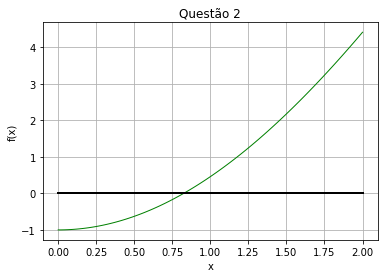

In [ ]:
f2 = lambda x: x**2 - math.cos(x)
plota(0, 2, 100, f2, 'green', 'Questão 2')

In [ ]:
# Por precisão truncado
false_position(f2, 0, 2, 0.0001, None, 'precisao', 'truncate')

For  1  iterations: x =  0.3692  - truncated
For  2  iterations: x =  1.8122  - truncated
For  3  iterations: x =  0.4006  - truncated
For  4  iterations: x =  1.6713  - truncated
For  5  iterations: x =  0.4292  - truncated
For  6  iterations: x =  1.5611  - truncated
For  7  iterations: x =  0.4554  - truncated
For  8  iterations: x =  1.472  - truncated
For  9  iterations: x =  0.4797  - truncated
For  10  iterations: x =  1.3985  - truncated
For  11  iterations: x =  0.5022  - truncated
For  12  iterations: x =  1.3365  - truncated
For  13  iterations: x =  0.5232  - truncated
For  14  iterations: x =  1.2837  - truncated
For  15  iterations: x =  0.5428  - truncated
For  16  iterations: x =  1.2381  - truncated
For  17  iterations: x =  0.5611  - truncated
For  18  iterations: x =  1.1984  - truncated
For  19  iterations: x =  0.5782  - truncated
For  20  iterations: x =  1.1635  - truncated
For  21  iterations: x =  0.5943  - truncated
For  22  iterations: x =  1.1326  - truncate

0.824

In [ ]:
# Por precisão arredondado
false_position(f2, 0, 2, 0.0001, None, 'precisao', 'round')

For  1  iterations: x =  0.3693  - rounded
For  2  iterations: x =  1.8122  - rounded
For  3  iterations: x =  0.4006  - rounded
For  4  iterations: x =  1.6714  - rounded
For  5  iterations: x =  0.4292  - rounded
For  6  iterations: x =  1.5611  - rounded
For  7  iterations: x =  0.4555  - rounded
For  8  iterations: x =  1.4721  - rounded
For  9  iterations: x =  0.4797  - rounded
For  10  iterations: x =  1.3985  - rounded
For  11  iterations: x =  0.5023  - rounded
For  12  iterations: x =  1.3366  - rounded
For  13  iterations: x =  0.5232  - rounded
For  14  iterations: x =  1.2838  - rounded
For  15  iterations: x =  0.5428  - rounded
For  16  iterations: x =  1.2382  - rounded
For  17  iterations: x =  0.5611  - rounded
For  18  iterations: x =  1.1984  - rounded
For  19  iterations: x =  0.5783  - rounded
For  20  iterations: x =  1.1635  - rounded
For  21  iterations: x =  0.5943  - rounded
For  22  iterations: x =  1.1327  - rounded
For  23  iterations: x =  0.6094  - round

0.8241

In [ ]:
# Por iteracoes
false_position(f2, 0, 2, None, 250, 'iteration')

For  1  iterations: x =  0.3692662072055313
For  2  iterations: x =  1.8122153000361276
For  3  iterations: x =  0.4006485018635363
For  4  iterations: x =  1.6713816568479891
For  5  iterations: x =  0.42922718333761584
For  6  iterations: x =  1.5611194299728757
For  7  iterations: x =  0.4554798471522557
For  8  iterations: x =  1.4720827925997115
For  9  iterations: x =  0.47974419056919204
For  10  iterations: x =  1.398502036911321
For  11  iterations: x =  0.5022696820159149
For  12  iterations: x =  1.3365961657814296
For  13  iterations: x =  0.523247523824334
For  14  iterations: x =  1.2837689384456363
For  15  iterations: x =  0.5428289803472788
For  16  iterations: x =  1.2381693986344808
For  17  iterations: x =  0.5611370912196177
For  18  iterations: x =  1.1984365538174606
For  19  iterations: x =  0.5782744291756529
For  20  iterations: x =  1.1635434832476403
For  21  iterations: x =  0.5943283894831723
For  22  iterations: x =  1.1326981404590648
For  23  iterations

0.8241819169965098

##Questão 3 – Determine por meio do método da tangente, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = x^5 - x -1

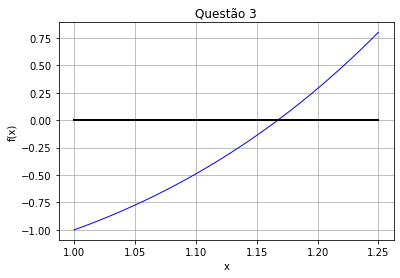

In [ ]:
# Calcula a derivada
x3 = Symbol('x')
y3 = x3**5 - x3 - 1
y3prime = y3.diff(x3)

# Transforma em uma função lambda
f3 = lambdify(x3, y3, 'numpy')
f3prime = lambdify(x3, y3prime, 'numpy')

plota(1, 1.25, 100, f3, 'blue','Questão 3')

In [ ]:
newton_raphson(f3, f3prime, 1.0, 0.0001, None, 'precisao')

For  1  iterations: x =  1.1784  - truncated
For  2  iterations: x =  1.1675  - truncated
For  3  iterations: x =  1.1673  - truncated


1.1673

In [ ]:
newton_raphson(f3, f3prime, 1.0, 0.0001, None, 'precisao', 'round')

For  1  iterations: x =  1.1785  - rounded
For  2  iterations: x =  1.1675  - rounded
For  3  iterations: x =  1.1673  - rounded


1.1673

In [ ]:
newton_raphson(f3, f3prime, 1.0, None, 3, 'iteration')

For  1  iterations: x =  1.1784593935169048
For  2  iterations: x =  1.16753738939611
For  3  iterations: x =  1.1673040828230083


1.1673040828230083

##Questão 4 – Determine por meio do método da secante, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = 3/(1+x^2) - 1/(2x^3)

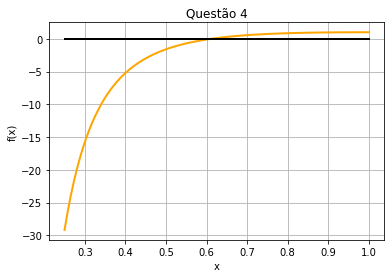

In [ ]:
f4 = lambda x: 3 / (1+x**2) -  1 / (2*(x**3))
plota(0.25, 1, 100, f4, 'orange', 'Questão 4', 2)

In [ ]:
secant(f4, 0.1, 0.8, 0.0001, None, 'precisao', 'truncate')

For  1  iterations: x =  0.3482  - truncated
For  2  iterations: x =  0.7605  - truncated
For  3  iterations: x =  0.7287  - truncated
For  4  iterations: x =  0.5089  - truncated
For  5  iterations: x =  0.6581  - truncated
For  6  iterations: x =  0.6291  - truncated
For  7  iterations: x =  0.6084  - truncated
For  8  iterations: x =  0.6121  - truncated
For  9  iterations: x =  0.6118  - truncated


0.6118

In [ ]:
secant(f4, 0.1, 0.8, 0.0001, None, 'precisao', 'round')

For  1  iterations: x =  0.3483  - rounded
For  2  iterations: x =  0.7605  - rounded
For  3  iterations: x =  0.7288  - rounded
For  4  iterations: x =  0.509  - rounded
For  5  iterations: x =  0.6581  - rounded
For  6  iterations: x =  0.6292  - rounded
For  7  iterations: x =  0.6084  - rounded
For  8  iterations: x =  0.6121  - rounded
For  9  iterations: x =  0.6119  - rounded


0.6119

In [ ]:
secant(f4, 0.1, 0.8, None, 9, 'iteration')

For  1  iterations: x =  0.34828591871376713
For  2  iterations: x =  0.7605249863078698
For  3  iterations: x =  0.7287865938066402
For  4  iterations: x =  0.5089553550841888
For  5  iterations: x =  0.6581387700756525
For  6  iterations: x =  0.6291958122243828
For  7  iterations: x =  0.6084027061858228
For  8  iterations: x =  0.6121005843700225
For  9  iterations: x =  0.6118616357170454


0.6118616357170454

##Questão 5 – Determine a menor raiz positiva de f(x) = ln(x^2) - 0,7

1. Graficamente
2. Usando o método da bissecção (três iterações, x0=0,5 e x1=2)
3. Usando o método da falsa posição (três iterações, x0=0,5 e x1=2)
4. Discuta sobre os resultados obtidos

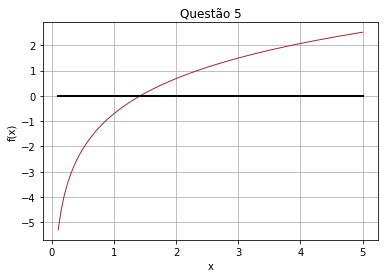

In [ ]:
f5 = lambda x: math.log(x**2) - 0.7
plota(0.1, 5, 100, f5, 'brown', 'Questão 5')

In [ ]:
bissection(f5, 0.5, 2, None, 3, 'iteracoes')

For  1  iterations: x =  1.25
For  2  iterations: x =  1.625
For  3  iterations: x =  1.4375


1.4375

In [ ]:
false_position(f5, 0.5, 2, None, 3, 'iteracoes')

For  1  iterations: x =  1.6287074482333528
For  2  iterations: x =  1.3795884843104
For  3  iterations: x =  1.426725122584835


1.426725122584835

### Discussão dos resultados da Questão 5

Dada as mesmas condições o método da falsa posição chega mais perto do resultado real. O que é espero já que ele é uma melhoria do método da bisseção. Mas claro que isso não é uma regra, e o método da bisseção pode ser melhor em alguns casos


##Questão 6 – Determine a menor raiz positiva de f(x) = 7sen(x)e^-1 - 1

1. Graficamente
2. Usando o método da tangente (três iterações, x0=0,3)
3. Usando o método da secante (três iterações, x0=0,5 e x1=0,4)
4. Discuta sobre os resultados obtidos

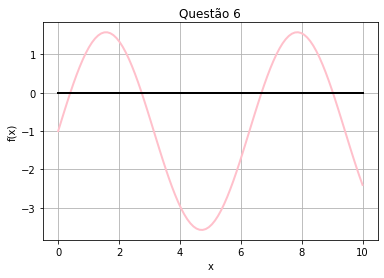

In [ ]:
my_e = 2.718281828459045
f6 = lambda x: 7 * sin(x) * (my_e**-1) - 1
plota(0, 10, 100, f6, 'pink', 'Questão 6',2)

In [ ]:
# Errors:
# AttributeError: 'Float' object has no attribute 'cos'

  # x6 = Symbol('x')
  # y6 = 7 * sin(x3) * (math.e**-1) - 1
  # y6prime = y6.diff(x6)
  # f6prime = lambdify(x6, y6prime, 'numpy')

# TypeError: loop of ufunc does not support argument 0 of type Float which has no callable cos method


# Calculando a derivada manualmente:
f6prime = lambda x: 2.5751560882001 * cos(x)
newton_raphson(f6, f6prime, 0.3, None, 3, 'iteracoes')

For  1  iterations: x =  0.398813723971340
For  2  iterations: x =  0.398814309428638
For  3  iterations: x =  0.398814309428710


0.398814309428710

In [ ]:
secant(f6, 0.5, 0.4, None, 3, 'iteracoes')

For  1  iterations: x =  0.398814316420182
For  2  iterations: x =  0.398814309428752
For  3  iterations: x =  0.398814309428711


0.398814309428711

### Discussão dos resultados da Questão 6

Dados as mesmas entradas para os métodos da tangente e.g. newton-raphson e o método da secante, eles se aproximam muito em seus resultados, não tendo diferença relevante, mas o método da secante se aproximou mais. O que não é muito esperado pois o método da tangente se aproxima do resultado mais rapidamente.